# Initialization

In [1]:
import OffsetArrays
using Plots
using Revise
using StatsBase
using ProgressMeter
using SparseArrays, LinearAlgebra, IndexedGraphs, Graphs
using Distributions
srcpath = "../src"
include("$srcpath/single_instance.jl")
#include("$srcpath/bp.jl")
#include("$srcpath/post_infer.jl")
#include("$srcpath/observables.jl")

nontrivial_conn (generic function with 1 method)

In [2]:
include("$srcpath/single_instance.jl")
T = 8
Ngraph = 4000 # size of the single instance graph
x = zeros(Int,Ngraph, T + 1) # a single epidemic trajectory
degree_dist = Dirac(3)
λp = 1.0
G = makeGraph(Ngraph,degree_dist)

{4000, 12000} directed sparse Int64 graph
⢴⡷⣿⡶⣒⣿⣯⣏⣳⣞⣾⣿⣟⣷⣿⡼⣽⣹⣷⣷⡶⣛⣾⢾⡻⢷⣶⠺⣽⣯⣿⣧⣿⡖⣻⣝⣷⣟⣳⣧
⢻⡿⢿⡷⣾⣭⡷⢟⣿⣾⣟⡿⣏⣻⣻⣧⣿⣻⡪⢟⢽⢵⣿⣿⡿⣮⣮⢿⣿⣿⣾⣯⡿⣿⣻⣿⣹⣿⣿⣟
⣼⣼⡞⣿⣾⡿⣽⢿⣭⣯⣻⢿⢿⡿⣿⣍⣟⣿⣿⣏⣭⣳⣿⢿⣿⣟⣿⣿⢿⣿⣿⣷⢿⣼⣿⣿⣾⣖⣿⠽
⡯⢿⣽⢏⣷⣟⣿⣿⣿⣟⣷⣫⣿⣲⣛⣿⣻⣿⣽⣿⢾⣞⣇⣯⣿⣗⣿⣟⣿⣩⣿⢛⢷⡽⣯⣿⣿⣻⣵⡯
⣹⢾⣻⣿⡧⣿⣿⢿⣯⣿⣟⣗⣿⢟⣱⠾⣙⣿⣿⣷⣾⣿⣴⣧⣿⢾⣽⢮⡝⡿⣾⣿⣟⢾⣾⣭⣯⣿⣞⣿
⣾⣿⣿⡽⣿⣞⡽⣻⢿⢽⢴⣳⣿⡷⠿⣿⣻⣵⣯⣿⣪⣾⣿⣿⡯⣎⣿⣷⡷⣾⣗⣿⢿⣃⢿⣲⣯⣿⡿⣳
⢿⣽⣯⣹⣿⡷⢻⣻⣿⢟⢿⡿⣱⢚⣴⣿⣿⣿⢟⣮⣽⡿⡟⠾⣟⣺⢿⣿⠷⢷⣝⣻⣿⡯⣙⣿⣫⣺⣙⣷
⣛⡿⠿⣾⡟⢿⣿⣼⣱⡞⣿⣧⣴⣿⣿⡿⡿⣿⣿⢹⣾⣻⣿⣯⣿⣷⣇⣿⣟⣜⢽⣿⣯⣻⡯⣿⣯⣽⢿⣏
⣗⣻⣿⣻⣿⣽⣿⣾⣷⣼⢟⣾⣿⣿⣿⣯⣾⡻⣷⣯⣿⢿⣽⣟⣽⡝⣿⣿⣿⣿⣿⣴⣻⡿⣿⢿⣟⣯⣷⢃
⢽⣿⣮⢎⡿⢿⣷⣿⢿⣿⣯⣿⡻⣵⣟⣛⡽⣿⣿⡿⡿⣻⢝⣟⣳⣿⣸⣿⣿⣿⣽⣽⣟⣾⣿⡯⣿⡿⣿⡷
⣼⢫⢗⣗⢧⣻⣺⢷⣾⣿⣪⣾⣷⡿⣾⣻⣿⣟⣿⣫⣿⠛⣿⡯⣻⣾⣿⣛⣿⣿⣿⣿⣿⣿⣻⣟⣿⣟⡻⣯
⣺⣟⣿⣿⣿⣟⡭⣽⠴⣿⣿⣿⣻⡍⡿⣿⣷⢿⣷⢵⡿⡿⣿⣿⣴⣻⡺⡷⣿⡿⣫⣿⣷⢻⣿⣯⡿⣻⡫⡏
⢿⣎⡻⣯⣿⢿⢿⢿⣻⣟⡫⢯⣻⣹⢿⣿⣗⠿⣽⣾⣻⣾⣴⣻⣥⡿⣻⢷⣧⣯⢷⣻⣿⣿⣿⣭⣿⢯⣗⣇
⣸⡛⣮⣟⣿⣿⣿⢿⡳⣟⢿⣿⣿⣷⣭⣽⣿⣿⣶⣾⣿⢻⢾⡮⢿⣞⣯⣿⡿⣻⢿⢽⣿⣾⡗⣜⣿⣟⣻⡿
⡷⣿⣿⣿⣿⣷⡟⣻⣷⡭⣹⣯⢽⣇⣛⢽⣿⣿⣿⣿⣿⣿⣿⡿⡭⣿⣿⣫⣮⣿⣊⣿⢩⡟⣷⣿⡷⣿⢿⣝
⠿⣿⡾⣿⢿⣿⣿⢛⣾⣿⣽⣽⣷⣹⣷⣷⢛⣿⣗⣿⣿⣿⣯⣾⣽⣳⣟⣗⣮⣼⣪⣾⣧⢿⣷⣟⡯⢿⢿⣽
⢻⠿⣿⣯⣛⣷⣝⡷⣻⣝⠿⢳⡿⡿⣯⣻⣿⡾⣻⣽⣿⣿⣽⣛⣿⣿⣻⣿⣧⠶⣭⣟⣾⡿⡿⡻⣻⣾⣷⣧
⣟⢾⣿⣾⣿⣿⣯⣿⡞⣿⢻⣳⣷⣼⣯⣯⣿⣟⡿⡿⣿⢾⡿⣿⡟⣿⣙⢭⣽⣿⣽⢿⣿⡫⣿⣻⢟⣾⣿⣱
⣽⢿⣷⣾⢺⢿⣿⣻⣯⣿⣯⣿⣫⣺⣏⣿⡿⣽⣿⡿⣿⢿⣿⣫⡿⣟⣿⢿⣽⣯⣯⣏⣻⣾⣻⣵⣾⣿⡿⣏
⠽⣾⣿⢿⣟⡟⡵⡿⣾⣽⢿⣫⢷⣼⡿⢷⠽⢛⢿⡿⡿⣮⡯⠮⠽⢽⣿⡾⣟⢷⣟⣷⠽⣿⢟⣻⡿⢯⢿⣷

In [3]:
function MCenergy(x,O,ε)
    ene = 0.0
    N = size(x,1)
    for j = 1:N
        if (x[j,end] == O[j][2]) 
            ene -= log(1-ε)
        else
            ene -= log(ε)
        end
    end
    return ene
end

function MC_step!(x,G,γ,O,ε)
    N = size(x,1)
    #first we evaluate the energy of the initial condition 
    new_ene = MCenergy(x,O,ε)
    i = rand(1:N) #extract a random individual
    oldx = x[i,1] #save the configuration in case we have to reject
    x[i,1] = (rand() < γ) #change the initial state
    if oldx == x[i,1]
        return
    end
    forward_epidemics!(x, G) # propagate 
    old_ene = new_ene #save the energy to understand if we have to reject
    new_ene = MCenergy(x,O,ε) #compute the energy
    new_ene - old_ene
    if new_ene > old_ene #then we have to throw a coin
        if exp(-(new_ene-old_ene)) < rand() # then we have to reject
            x[i,1] = oldx 
            forward_epidemics!(x,G) #rejection
        end
    end
end

function MC(γ, G, planted, x; ε = 1e-3, Nsweeps = 100)
    #returns the planted energy and the MC energy trajectory
    Ngraph = size(planted,1)
    T = size(planted,2) - 1
    O = [(i,Bool(planted[i,T+1]),T+1) for i = 1:Ngraph]
    sample!(x, G, λp, γ);
    energies = zeros(Nsweeps)
    for sw in 1:Nsweeps
        for i = 1:Ngraph
            MC_step!(x,G,γ,O,ε)
        end
        energies[sw] = MCenergy(x,O,ε)
        if energies[sw] == MCenergy(planted,O,ε)
            return true, energies
        end
    end
    return false, energies
end

function frac_inf(x)
    sum(x[:,end])/size(x,1)
end

frac_inf (generic function with 1 method)

# Single instance MC analysis

In [4]:
γ = 0.01
planted = zeros(Int,Ngraph, T + 1) # a single epidemic trajectory
sample!(planted, G, 1.0, γ)
frac_inf(planted)

0.9995

In [18]:
conv, energies = MC(γ,G,planted,copy(planted),Nsweeps=100)

(false, [52.349284784871756, 52.349284784871756, 52.349284784871756, 52.349284784871756, 52.349284784871756, 52.349284784871756, 52.349284784871756, 52.349284784871756, 52.349284784871756, 52.349284784871756  …  38.53577522757468, 38.53577522757468, 38.53577522757468, 38.53577522757468, 38.53577522757468, 38.53577522757468, 38.53577522757468, 38.53577522757468, 38.53577522757468, 38.53577522757468])

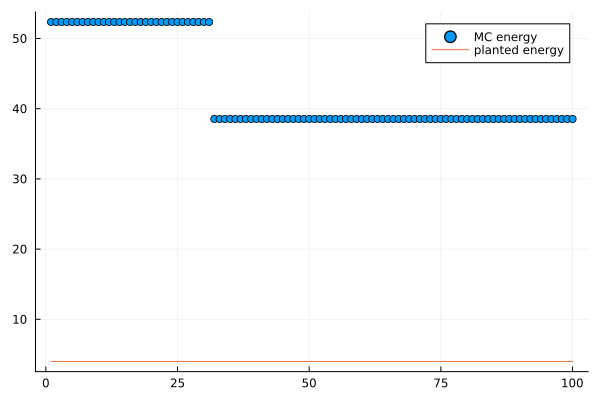

In [19]:
scatter(energies,label="MC energy")
plot!(plant_ene .* ones(length(energies)),label="planted energy")

# Same thing, but statistics
Here we take the fraction of instances that manage to get to the minimum

In [16]:
Ngraph = 2000
degree_dist = Dirac(3)
G = makeGraph(Ngraph,degree_dist)

{2000, 6000} directed sparse Int64 graph
⡠⡮⢗⠦⢲⡧⣸⢳⠷⢲⣗⡷⣜⢦⣈⡚⢾⡘⢔⣰⣍⢴⣨⡨⢒⣺⢤⣴⠲⣪⡄⣷⡓⠵⡜⣿⢄⢻⢿⡭
⠹⡕⢱⠖⠽⣢⠾⣞⡘⣯⣧⠭⡞⣙⡗⠺⢛⢕⠮⡥⡜⡊⡃⣛⣭⢮⡵⣕⣪⡚⣿⠷⡲⣗⡏⣙⣃⢎⢳⣍
⠼⡶⠳⣣⣠⣺⣰⢩⣶⠦⣻⡥⣜⢹⣻⣏⡇⠪⠿⢮⣎⣙⣻⢉⢿⡣⢪⣺⣼⠚⢇⢇⣿⢍⠞⡻⢞⡭⢻⣧
⢶⣚⣺⢧⡔⣚⣟⢙⣫⠫⠝⡮⢭⣏⡫⢻⠼⠇⣜⣒⣮⢯⣹⣥⠎⣡⡷⢴⣀⠧⢓⡼⡕⢿⢱⣸⢍⣯⡚⡍
⢹⣃⡶⣬⠸⡟⡯⡚⡎⠍⣟⣗⠣⣿⣋⡥⢠⡻⣭⣈⣹⢮⢾⣹⡯⢫⣴⣝⡻⡴⠪⡸⣴⠨⢗⢺⣶⣞⣢⣺
⢽⡽⡍⡟⠟⡾⡳⡥⢿⢽⣮⡻⢲⢞⣏⣽⡴⣁⡏⣷⡌⠳⡭⡓⣇⡳⣴⡐⢡⢟⣛⡼⢶⡷⣾⢙⣡⡑⠢⢣
⠲⣝⣞⢩⣖⣙⡧⢷⣭⣦⣸⢖⣿⡻⠍⡤⠦⠜⣿⣩⣟⠱⣛⢗⡸⠿⣧⢟⣱⡙⣴⣌⡙⣔⣗⢟⢨⡳⠺⠑
⣢⠸⣹⡉⡿⢾⣯⣊⠏⡼⣏⣽⠃⡥⡱⡪⢮⣹⡗⠏⡄⡮⢗⣤⣎⡐⣿⡯⡿⡢⢻⣶⣖⣘⢞⢧⡯⠶⠛⣁
⣚⠳⢟⢔⡩⡉⠶⠇⣤⡲⠔⢫⣈⠇⣎⣳⢾⣷⢤⠾⢬⡯⣛⣰⠾⢹⡻⣣⠫⠫⣔⣾⢕⢽⣿⡣⢹⣵⣚⡏
⢐⣱⠎⡧⡻⣇⢲⢹⡃⢻⢯⣭⡟⣻⡽⠍⣠⡗⡮⣫⢪⢎⢭⢹⣟⡗⢕⢣⢇⣞⡧⢶⣟⡨⣣⡣⡻⣚⣿⢂
⢃⣝⡲⠩⣎⢹⡮⣟⡳⣞⢦⡉⢟⡙⡠⡭⡦⡷⡪⢖⣏⠙⠺⡺⡶⣾⠦⣟⣗⣹⣯⣴⣓⡻⣴⠟⣫⡵⢯⡄
⡂⡺⣭⢨⡟⢚⠗⣾⣞⣳⢧⠫⢿⢜⠙⣵⢛⣸⣇⣓⣺⡢⡏⡭⠼⡟⠥⡵⣏⢮⣮⡯⢬⣶⠦⢅⣟⣇⢭⠗
⣸⣰⡣⣟⠿⡳⠎⣡⡯⣋⢭⡹⣶⡎⢊⠹⣞⣃⢿⠽⣸⣯⣶⠧⣏⢙⣧⣽⣯⣽⢾⢫⣟⣮⣆⠇⣗⢒⣻⠀
⢀⣷⢕⢯⣪⣲⢙⣏⣔⢿⢐⠻⣭⢟⡿⡿⠿⣪⠵⣑⣬⢧⢅⡧⣍⣿⣎⠝⠽⢗⡊⣲⡾⢶⢟⣋⣆⣟⣕⣣
⡸⣢⣪⠺⣲⠛⠤⡜⢛⡮⣥⢖⣕⠺⠻⡫⡯⡂⣩⢵⣝⣹⡫⣝⣏⣿⢷⢇⡱⡮⡣⣫⣿⢓⢔⡱⡴⢤⡑⣭
⢤⣭⢿⡟⠭⢕⣙⡴⣊⡢⣛⡼⡐⢿⢻⣶⣰⣽⢩⣏⢋⣿⡮⡿⡾⣓⢪⣨⡭⣪⡺⡪⠆⠿⣾⢈⢟⢾⣵⡧
⢝⡌⢼⢮⡟⢟⣵⣍⡐⡛⢼⡷⢓⢬⣘⢹⣕⣕⡛⡹⣽⡸⢢⣷⡻⣽⢺⣏⢿⢛⣬⡅⣴⠛⠦⡫⡮⡏⡧⣬
⣶⣭⣏⢩⣾⡡⣑⣲⣹⣑⣞⢛⣽⢝⠾⣕⠿⡻⠭⡺⣴⠟⠌⢇⠬⠝⡿⢱⢔⡱⡚⢛⡬⡣⣎⡹⣳⠗⡺⠮
⣤⣑⡩⢜⡞⡵⡧⣵⣸⢿⢅⠺⢦⡲⢫⡏⢗⣶⣻⢪⢏⡾⠿⢽⢹⢙⣬⢽⠐⣏⣻⣕⡮⠯⢽⠞⡏⣭⣻⡈
⡟⡷⡝⢶⠿⣶⡞⠬⣨⣺⠬⣂⢞⠂⠟⢠⡾⠼⠻⢛⠋⠷⢧⠗⠛⠚⠵⣹⡕⣬⠵⡿⡉⣯⡺⡎⡛⠺⣡⠚

In [ ]:
γRange = LinRange(0.002,0.025,35)
n_instances = 250
num_anneal = 5
frac_of_conv = zeros(length(γRange))
swXann = 400 #sweeps for anneal
ε = LinRange(1e-3,1e-10,num_anneal) #the softening parameter
a = time()
Threads.@threads for st = 1:length(γRange)
    for instance = 1:n_instances
        planted = zeros(Int,Ngraph, T + 1) # a single epidemic trajectory
        sample!(planted, G, 1.0, γRange[st])
        x = copy(planted) #the MC trajectory 
        for step_anneal = 1:num_anneal
            conv, energies = MC(γRange[st],G,planted,x,ε=ε[step_anneal],Nsweeps=swXann)
            if conv 
                frac_of_conv[st] += 1/n_instances
                break
            end
        end
    end
end
b = time()
print(b-a)

In [ ]:
(b-a) / 360/24

In [ ]:
plot(γRange,frac_of_conv,xlabel="γ",ylabel="fraction of success",label=false)

In [21]:
using DelimitedFiles
open("./N=$(Ngraph)MC.txt","w") do io
    writedlm(io,frac_of_conv) 
end

In [22]:
Ngraph

2000